Download the dataset from:  https://github.com/bellawillrise/Introduction-to-Numerical-Computing-in-Python/

Submit a pdf file, which is a rendered saved version of the jupyter notebook.  Make sure to execute all the codes so the output can be viewed in the pdf. 

Also include the link to the public github repository where the jupyter notebook for the assignment is uploaded. 

Link to the github repository: <</insert link>>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# %matplotlib inline

In [3]:
# load the dataset
path = "C:/Users/User/Desktop/FOURTH YEAR/CMSC-197/dataset/movie_metadata_cleaned.csv"
data = pd.read_csv(path, low_memory = False)

In [4]:
data.columns

Index(['Unnamed: 0', 'movie_title', 'color', 'director_name',
       'num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'gross', 'genres', 'actor_1_name', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

In [5]:
data.shape

(5044, 29)

In [6]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

In [7]:
# clean the data
cleaned_data = data.fillna(0)
cleaned_data

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,359.0,English,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,3.0,English,USA,0,1400.0,2013.0,0.0,6.3,0.00,16.0
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,9.0,English,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456.0


In [8]:
# convert the float into int both the gross and the budget
cleaned_data['gross'] = cleaned_data['gross'].fillna(0)
cleaned_data['gross'] = cleaned_data['gross'].astype(np.int64) 
cleaned_data['gross'].dtype

cleaned_data['budget'] = cleaned_data['budget'].fillna(0)
cleaned_data['budget'] = cleaned_data['budget'].astype(np.int64) 
cleaned_data['budget'].dtype


dtype('int64')

In [9]:
clean = cleaned_data[["gross","budget"]]
clean

,gross,budget
0,760505847,237000000
1,309404152,300000000
2,200074175,245000000
3,448130642,250000000
4,0,0
...,...,...
5039,0,0
5040,0,1400
5041,10443,0
5042,85222,1100


In [10]:
top_directors_count = cleaned_data["director_name"].value_counts()
print(top_directors_count.head(10))


director_name
0                    104
Steven Spielberg      26
Woody Allen           22
Martin Scorsese       20
Clint Eastwood        20
Ridley Scott          17
Tim Burton            16
Spike Lee             16
Steven Soderbergh     16
Renny Harlin          15
Name: count, dtype: int64


In [11]:
# sort the top 10 directors

top10_director = cleaned_data["director_name"].value_counts().head(10).index
top_director = cleaned_data[cleaned_data["director_name"].isin(top10_director)]
top_director.head(10)


,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
22,22,b'Robin Hood',Color,Ridley Scott,343.0,156.0,0.0,738.0,William Hurt,891.0,...,546.0,English,USA,PG-13,200000000,2010.0,882.0,6.7,2.35,17000.0
33,33,b'Alice in Wonderland',Color,Tim Burton,451.0,108.0,13000.0,11000.0,Alan Rickman,40000.0,...,736.0,English,USA,PG,200000000,2010.0,25000.0,6.5,1.85,24000.0
54,54,b'Indiana Jones and the Kingdom of the Crystal...,Color,Steven Spielberg,470.0,122.0,14000.0,1000.0,Ray Winstone,11000.0,...,2054.0,English,USA,PG-13,185000000,2008.0,1000.0,6.2,2.35,5000.0
70,70,b'Hugo',Color,Martin Scorsese,682.0,126.0,17000.0,1000.0,Christopher Lee,17000.0,...,678.0,English,USA,PG,170000000,2011.0,16000.0,7.5,1.85,42000.0
118,118,b'Charlie and the Chocolate Factory',Color,Tim Burton,276.0,115.0,13000.0,588.0,Christopher Lee,40000.0,...,1361.0,English,USA,PG,150000000,2005.0,16000.0,6.7,1.85,0.0
134,134,b'Dark Shadows',Color,Tim Burton,526.0,113.0,13000.0,16000.0,Chloë Grace Moretz,40000.0,...,479.0,English,USA,PG-13,100000000,2012.0,17000.0,6.2,1.85,82000.0
159,159,b'Exodus: Gods and Kings',Color,Ridley Scott,314.0,150.0,0.0,748.0,María Valverde,23000.0,...,657.0,English,UK,PG-13,140000000,2014.0,893.0,6.1,2.35,51000.0
177,177,b'Miami Vice ',Color,0,21.0,60.0,0.0,184.0,Philip Michael Thomas,982.0,...,74.0,English,USA,TV-14,1500000,0.0,321.0,7.5,1.33,0.0
178,178,b'The BFG',Color,Steven Spielberg,252.0,117.0,14000.0,358.0,Penelope Wilton,535.0,...,106.0,English,UK,PG,140000000,2016.0,400.0,6.8,2.35,27000.0
189,189,b'War of the Worlds',Color,Steven Spielberg,401.0,116.0,14000.0,807.0,Lisa Ann Walter,10000.0,...,2741.0,English,USA,PG-13,132000000,2005.0,1000.0,6.5,1.85,0.0


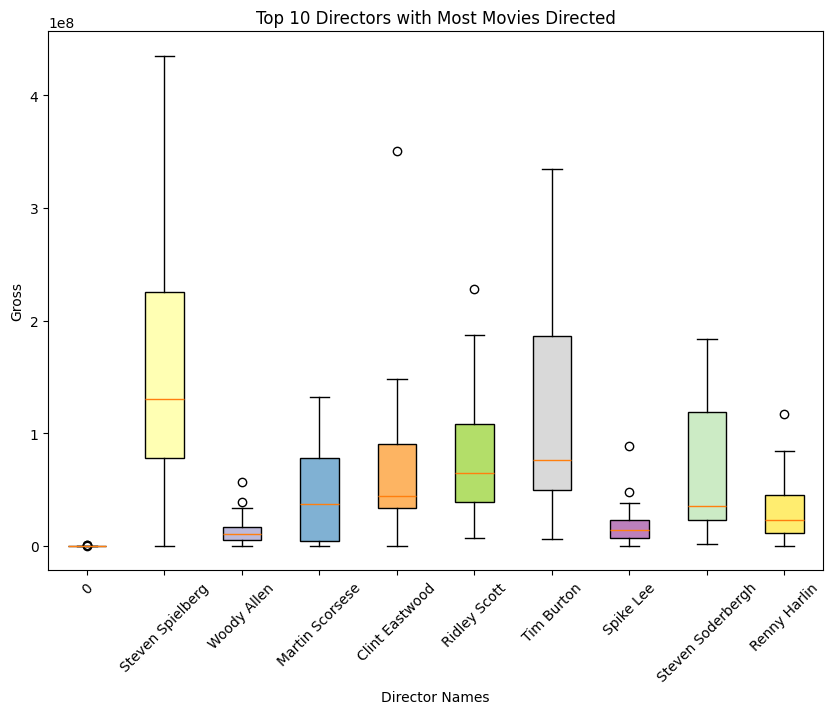

In [38]:
# 0 showed since there is NaN in data
plt.figure(figsize=(10, 7))
colors = plt.cm.Set3(np.linspace(0, 1, len(top10_director)))

boxplot = plt.boxplot([top_director[top_director["director_name"] == director]["gross"].dropna() 
                       for director in top10_director],
                      tick_labels=top10_director,
                      patch_artist=True
                      )

for patch, color in zip(boxplot["boxes"], colors):
    patch.set_facecolor(color)

plt.title("Top 10 Directors with Most Movies Directed")
plt.xlabel("Director Names")
plt.ylabel("Gross")
plt.xticks(rotation=45)

plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

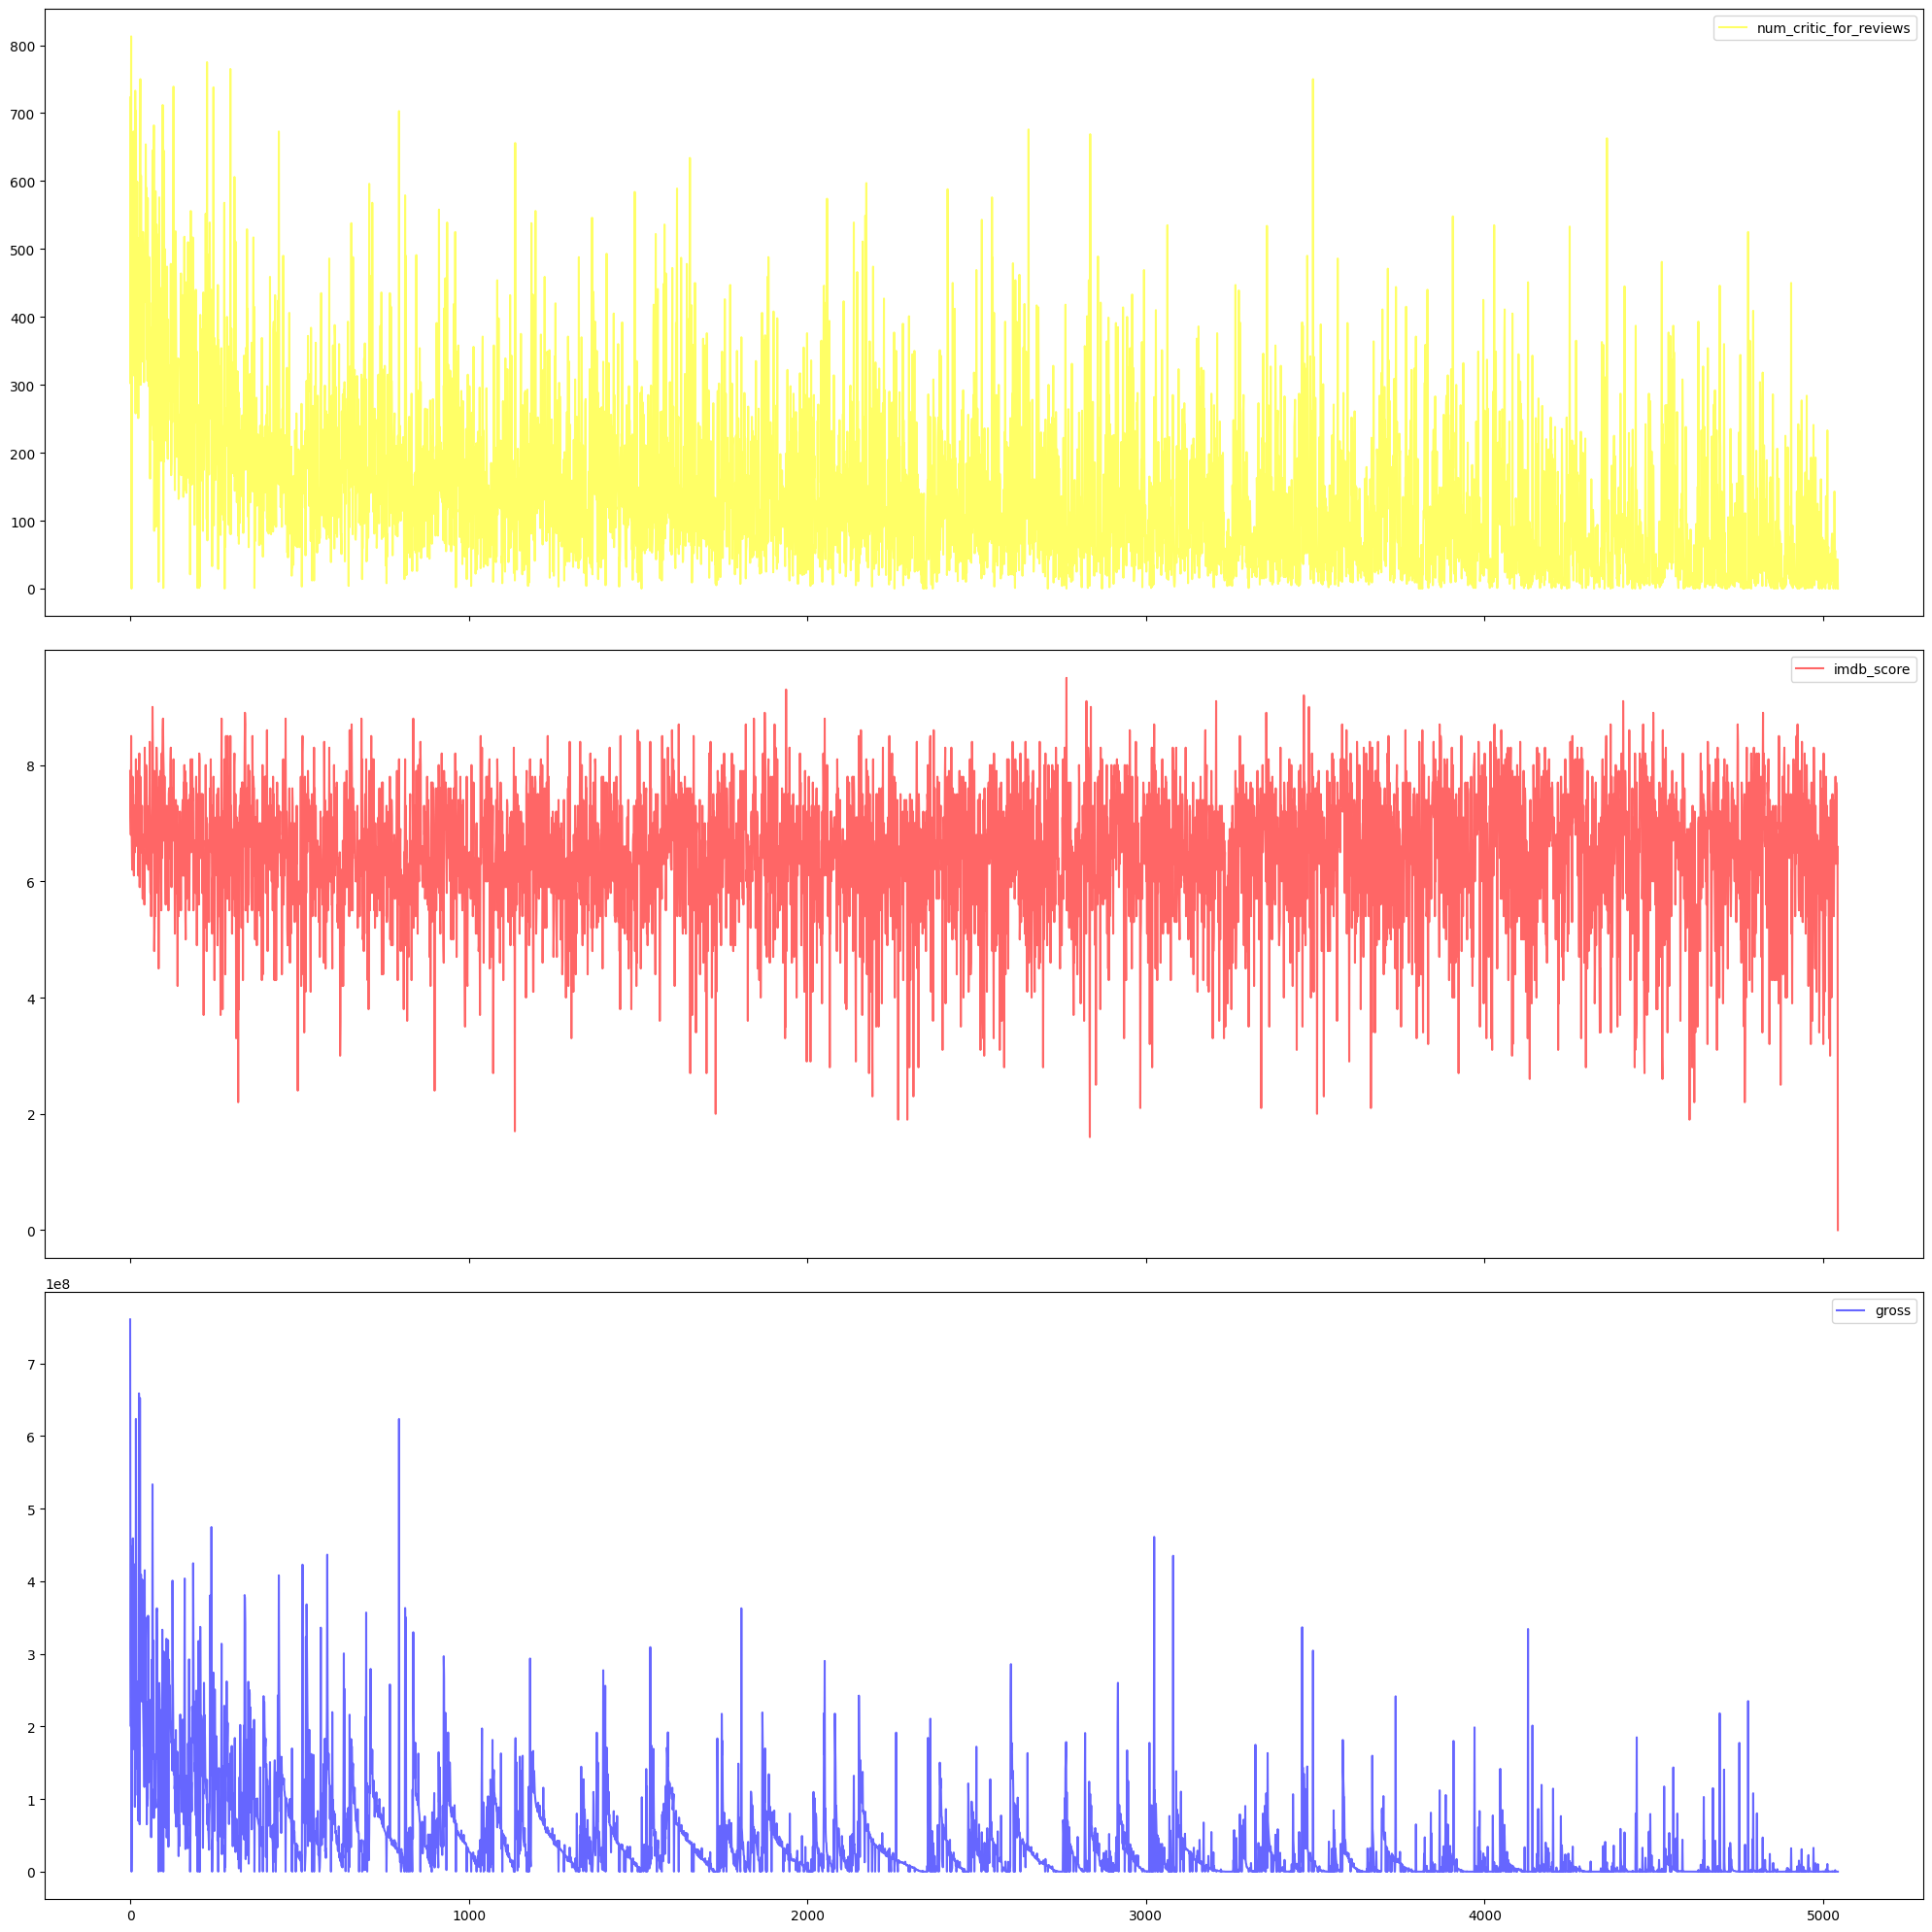

In [13]:
# plot 3 in one graph
# utilized the subplot for visualization
plot = cleaned_data[["num_critic_for_reviews", "imdb_score", "gross"]].plot(
    figsize=(20, 20),
    color={"num_critic_for_reviews": "yellow", "imdb_score": "red", "gross": "blue"},
    subplots=True,
    layout=(3, 1), 
    alpha = 0.6,
)

plt.tight_layout()
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [14]:
# compute_sales= ["gross", "budget"]
# cleaned_data["sales"].dtype
cleaned_data['sales'] = cleaned_data["gross"] - cleaned_data["budget"]
cleaned_data['sales'] = cleaned_data['sales'].fillna(0)
cleaned_data['sales'] = cleaned_data['sales'].astype(np.int64) 

cleaned_data

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,English,USA,PG-13,237000000,2009.0,936.0,7.9,1.78,33000.0,523505847
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,English,USA,PG-13,300000000,2007.0,5000.0,7.1,2.35,0.0,9404152
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,English,UK,PG-13,245000000,2015.0,393.0,6.8,2.35,85000.0,-44925825
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,English,USA,PG-13,250000000,2012.0,23000.0,8.5,2.35,164000.0,198130642
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0,0,0.0,12.0,7.1,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,English,USA,TV-14,0,0.0,593.0,7.5,16.00,32000.0,0
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,English,USA,0,1400,2013.0,0.0,6.3,0.00,16.0,-1400
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,English,USA,PG-13,0,2012.0,719.0,6.3,2.35,660.0,10443
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,English,USA,PG,1100,2004.0,23.0,6.6,1.85,456.0,84122


## Which directors garnered the most total sales?

In [15]:
top_sales_director = cleaned_data.groupby("director_name")["sales"].sum()
top_10_sales_directors = top_sales_director.sort_values(ascending=False).head(10)
print("The top directors with most total sales")
top_10_sales_directors


The top directors with most total sales


director_name
Steven Spielberg     2451332231
George Lucas         1386641480
James Cameron        1199625910
Joss Whedon          1000886628
Chris Columbus        941707624
Peter Jackson         900969279
Tim Burton            824275480
Christopher Nolan     808227576
Jon Favreau           769381547
Francis Lawrence      755501971
Name: sales, dtype: int64

## Plot sales and average likes as a scatterplot. Fit it with a line.

In [16]:
cleaned_data.columns

Index(['Unnamed: 0', 'movie_title', 'color', 'director_name',
       'num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'gross', 'genres', 'actor_1_name', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'sales'],
      dtype='object')

In [17]:
# got the mean of all with likes keyword

cleaned_data["total_average_likes"] = cleaned_data[[
    "director_facebook_likes", "actor_1_facebook_likes", 
    "actor_2_facebook_likes", "actor_3_facebook_likes",
    "cast_total_facebook_likes","movie_facebook_likes"
]].mean(axis=1)
cleaned_data

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,total_average_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000,2009.0,936.0,7.9,1.78,33000.0,523505847,6770.833333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000,2007.0,5000.0,7.1,2.35,0.0,9404152,15818.833333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000,2015.0,393.0,6.8,2.35,85000.0,-44925825,18042.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000,2012.0,23000.0,8.5,2.35,164000.0,198130642,60959.833333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0,0.0,12.0,7.1,0.00,0.0,0,69.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,USA,TV-14,0,0.0,593.0,7.5,16.00,32000.0,0,5917.666667
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,USA,0,1400,2013.0,0.0,6.3,0.00,16.0,-1400,2.666667
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,USA,PG-13,0,2012.0,719.0,6.3,2.35,660.0,10443,866.666667
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,USA,PG,1100,2004.0,23.0,6.6,1.85,456.0,84122,126.666667


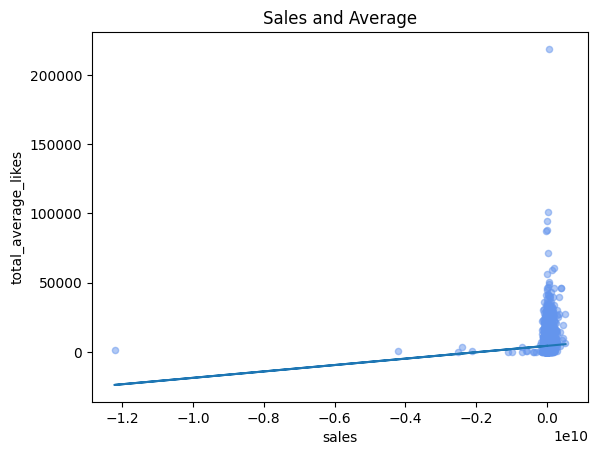

In [18]:
# plot sales with ave likes
sales = cleaned_data["sales"]
total_average_likes = cleaned_data["total_average_likes"]

scatter_plot = cleaned_data.plot.scatter(x = "sales" , 
                                         y = "total_average_likes", 
                                        title = "Sales and Average",
                                        c = "cornflowerblue",
                                        s = 20,
                                        alpha = 0.5)                         
scatter_plot

slope, intercept = np.polyfit(sales,total_average_likes , 1)
plt.plot(sales, slope * sales + intercept)

In [19]:
# genre sales
profitable_genre = cleaned_data.groupby("genres")["sales"].sum()
profitable_genre_sales = profitable_genre.sort_values(ascending=False)
profitable_genre_sales

genres
Comedy                                                3410157301
Comedy|Romance                                        2529577861
Action|Adventure|Fantasy|Sci-Fi                       2394717100
Action|Adventure|Sci-Fi                               2152709191
Comedy|Drama|Romance                                  1611888871
                                                        ...     
Action|Adventure|Animation|Family|Sci-Fi|Thriller    -2127109510
Drama|Romance|War                                    -2307944752
Adventure|Animation|Fantasy                          -2427701809
Crime|Drama                                          -3787097826
Comedy|Drama|Horror|Sci-Fi                          -12221000478
Name: sales, Length: 915, dtype: int64

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

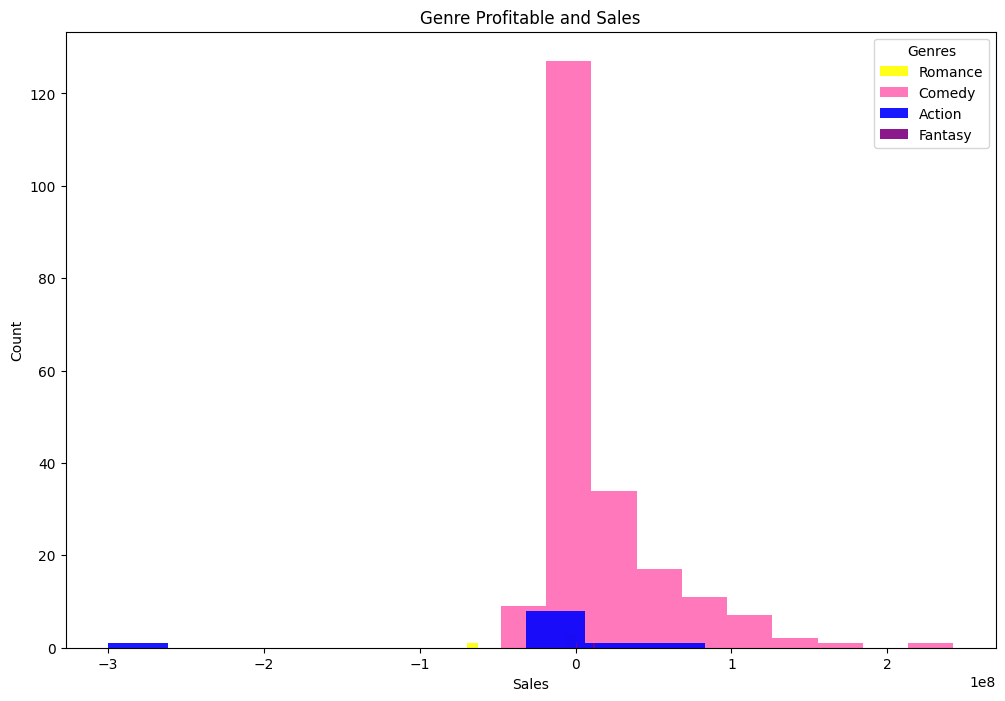

In [35]:
# displayed genre

different_genres = ["Romance", "Comedy", "Action", "Fantasy"]
filtered_genre = cleaned_data[cleaned_data["genres"].isin(different_genres)]

plt.figure(figsize=(12, 8))
color_scale={"Romance": "yellow", "Comedy": "hotpink", "Action": "blue", "Fantasy":"purple"}

for genre in different_genres:
    superimpose_genres = filtered_genre[filtered_genre["genres"] == genre]
    plt.hist(superimpose_genres["sales"], 
             bins=10,
             alpha=0.9, 
             label=genre, 
             color= color_scale[genre]
             )

plt.title("Genre Profitable and Sales")
plt.xlabel("Sales")
plt.ylabel("Count")
plt.legend(title="Genres")

plt.show()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [21]:
# converting likes to integers [act1,act2,act3]
# cd1 = cleaned_data["actor_1_facebook_likes"].dtype
cleaned_data['actor_1_facebook_likes'] = cleaned_data['actor_1_facebook_likes'].fillna(0)
cleaned_data['actor_1_facebook_likes'] = cleaned_data['actor_1_facebook_likes'].astype(np.int64) 
cleaned_data['actor_1_facebook_likes'].dtype

cleaned_data['actor_2_facebook_likes'] = cleaned_data['actor_2_facebook_likes'].fillna(0) 
cleaned_data['actor_2_facebook_likes'] = cleaned_data['actor_2_facebook_likes'].astype(np.int64) 
cleaned_data['actor_2_facebook_likes'].dtype

cleaned_data['actor_3_facebook_likes'] = cleaned_data['actor_3_facebook_likes'].fillna(0)
cleaned_data['actor_3_facebook_likes'] = cleaned_data['actor_3_facebook_likes'].astype(np.int64) 
cleaned_data['actor_3_facebook_likes'].dtype

dtype('int64')

In [22]:
#average of likes 
cleaned_data["average_actor_likes"] = cleaned_data[[
     "actor_1_facebook_likes", 
    "actor_2_facebook_likes", 
    "actor_3_facebook_likes"
]].mean(axis=1)
cleaned_data

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,total_average_likes,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855,Joel David Moore,1000,...,PG-13,237000000,2009.0,936,7.9,1.78,33000.0,523505847,6770.833333,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000,Orlando Bloom,40000,...,PG-13,300000000,2007.0,5000,7.1,2.35,0.0,9404152,15818.833333,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161,Rory Kinnear,11000,...,PG-13,245000000,2015.0,393,6.8,2.35,85000.0,-44925825,18042.333333,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000,Christian Bale,27000,...,PG-13,250000000,2012.0,23000,8.5,2.35,164000.0,198130642,60959.833333,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0,Rob Walker,131,...,0,0,0.0,12,7.1,0.00,0.0,0,69.500000,47.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319,Valorie Curry,841,...,TV-14,0,0.0,593,7.5,16.00,32000.0,0,5917.666667,584.333333
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0,Maxwell Moody,0,...,0,1400,2013.0,0,6.3,0.00,16.0,-1400,2.666667,0.000000
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489,Daniel Henney,946,...,PG-13,0,2012.0,719,6.3,2.35,660.0,10443,866.666667,718.000000
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16,Brian Herzlinger,86,...,PG,1100,2004.0,23,6.6,1.85,456.0,84122,126.666667,41.666667


## Copying the whole dataframe

In [23]:
df = data.copy()
df.head()
# df.describe()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [37]:
# include int, float
for col in df.select_dtypes(include=["float64", 'int64']).columns:
    minimum = df[col].min()
    maximum = df[col].max()
df[col] = (df[col] - minimum) / (maximum - minimum)
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,0.094556
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.000000
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,0.243553
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,0.469914
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,0,0,0,0.0,0.0,12.0,7.1,0.00,0.000000


In [30]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 5044 non-null   int64  
 1   movie_title                5044 non-null   object 
 2   color                      5044 non-null   object 
 3   director_name              5044 non-null   object 
 4   num_critic_for_reviews     5044 non-null   float64
 5   duration                   5044 non-null   float64
 6   director_facebook_likes    5044 non-null   float64
 7   actor_3_facebook_likes     5044 non-null   float64
 8   actor_2_name               5044 non-null   object 
 9   actor_1_facebook_likes     5044 non-null   float64
 10  gross                      5044 non-null   float64
 11  genres                     5044 non-null   object 
 12  actor_1_name               5044 non-null   object 
 13  num_voted_users            5044 non-null   float